In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

## Pre-Tourney KenPom Data from 2002 through 2018

In [2]:
# Read in Rating Datasets
nums = ['0'+str(i) for i in range(2,10)] + [str(i) for i in range(10,19)]
data = pd.DataFrame()
for num in nums: 
    data = data.append(pd.read_csv('data/pomeroy_ratings/summary{}_pt.csv'.format(num)))
    
data.head()

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed
0,2002,Duke,77.0734,8,73.9016,10,116.373,1,121.374,1,90.2544,4,87.3522,2,34.0220,1,1.0
1,2002,Cincinnati,68.4368,212,66.9485,202,112.274,10,117.448,7,86.3924,1,86.6033,1,30.8442,2,1.0
2,2002,Kansas,79.0371,5,77.6019,2,114.544,4,118.100,5,94.4261,39,90.3113,7,27.7883,3,1.0
3,2002,Maryland,75.2758,20,73.3263,16,113.167,5,118.151,4,94.3706,36,91.2974,12,26.8534,4,1.0
4,2002,Florida,71.8971,84,69.5612,95,110.418,22,115.387,16,91.1250,7,89.6694,5,25.7176,5,5.0


In [3]:
# Get Average AdjEM for Each Seed
seed_avg_EM = []
seed_sd_EM = []
for i in range(1,17):
    temp_df = data[data['seed']==i]
    seed_avg_EM.append(np.mean(temp_df['AdjEM']))
    seed_sd_EM.append(np.std(temp_df['AdjEM']))

In [6]:
seed_sd_EM

[3.2611604376870527,
 2.741881677668443,
 2.7890025313360463,
 3.2054268117673326,
 2.8065205287713106,
 2.95262891985809,
 2.919216661091544,
 2.7652347123465577,
 2.5830992244152773,
 3.1905078244102847,
 3.0610051208340665,
 3.34057633919381,
 3.4066107769293574,
 3.6612176269441434,
 3.2462183141511374,
 4.89507258116035]

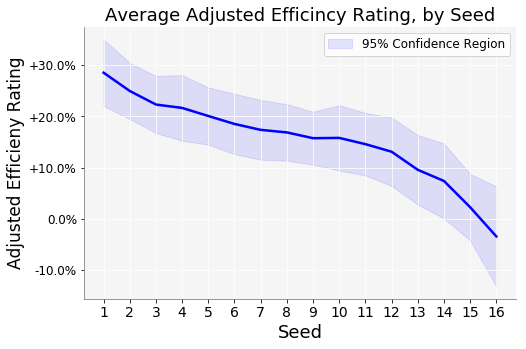

In [4]:
lower = np.array(seed_avg_EM) - np.array(np.multiply(seed_sd_EM, 1.996)) # 95% CI w/ t-dist
upper = np.array(seed_avg_EM) + np.array(np.multiply(seed_sd_EM, 1.996))

fig, ax = plt.subplots(1,1,figsize=(8,5))

plt.gcf().subplots_adjust(left=0.15)
###plt.style.use('seaborn-notebook')

ax.plot(seed_avg_EM, color='blue', linewidth=2.5)

ax.fill_between(range(16),lower, seed_avg_EM, color='blue', alpha=.1, label='95% Confidence Region')
ax.fill_between(range(16),upper, seed_avg_EM, color='blue', alpha=.1)

ax.set_xticks(range(16))
ax.set_xticklabels(range(1,17), fontsize=14)

ax.set_yticklabels(['', '-10.0%', '0.0%', '+10.0%', '+20.0%', '+30.0%'], fontsize=12)

ax.set_facecolor('whitesmoke')
ax.grid(color='w')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Average Adjusted Efficincy Rating, by Seed', fontsize=18)
ax.set_ylabel('Adjusted Efficieny Rating', fontsize=17)
ax.set_xlabel('Seed', fontsize=18)

ax.legend(fontsize=12)

#plt.savefig('AdjEMvSeed.pdf')
plt.show()

In [6]:
def difficulty(seed1, seed2):
    return seed_avg_EM[seed1-1]-seed_avg_EM[seed2-1]

# Get Difference in AdjEM of 1-8/9 seeds and 2-10 Seeds
eightnine = (seed_avg_EM[8-1] + seed_avg_EM[9-1])/2
print('Difference in Avg EdjEM of 1 seeds and 8/9 seeds is: ', seed_avg_EM[1-1]-eightnine)
print('Difference in Avg EdjEM of 2 seeds and 10 seeds is: ', difficulty(2,10))
print('Ratio of these two: ', (seed_avg_EM[1-1]-eightnine)/difficulty(2,10))

Difference in Avg EdjEM of 1 seeds and 8/9 seeds is:  12.222581102941177
Difference in Avg EdjEM of 2 seeds and 10 seeds is:  9.1635175
Ratio of these two:  1.333830715436641


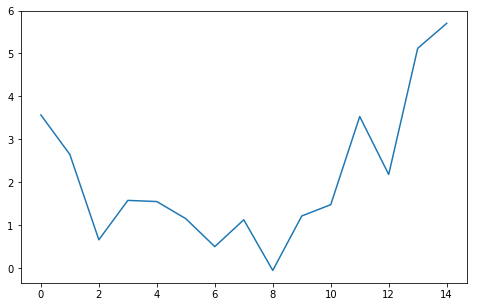

In [7]:
difficulties = []

# Plotting Ratios to the Above Seed
for i in range(1, 16):
    difficulties.append(difficulty(i, i+1))
    
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(difficulties)

plt.show()

## Are 10 seeds who win the 10/7 matchup significantly better than 10 seeds who don't?

In [8]:
# Read in Datasets
seven_over_ten = pd.read_csv('seven_over_ten.csv')
ten_over_seven = pd.read_csv('ten_over_seven.csv')
team_df = pd.read_csv('data/teams.csv')

seven_over_ten = seven_over_ten[seven_over_ten['Season']>=2002]
ten_over_seven = ten_over_seven[ten_over_seven['Season']>=2002]
team_df = team_df.set_index('TeamID')

In [9]:
team_df.head()

,TeamName,FirstD1Season,LastD1Season
TeamID,,,
1101,Abilene Chr,2014,2018
1102,Air Force,1985,2018
1103,Akron,1985,2018
1104,Alabama,1985,2018
1105,Alabama A&M,2000,2018


In [10]:
ten_over_seven.head()

,Unnamed: 0,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,WRegion,LRegion,TScore,TTO,TFGA,TFGA3,TPF
28,1078,2002,136,1245,69,1329,61,N,0.0,10,7,Y,Y,130,NaN,NaN,NaN,NaN
29,1138,2003,136,1113,84,1272,71,N,0.0,10,7,Z,Z,155,NaN,NaN,NaN,NaN
30,1153,2003,137,1120,65,1386,63,N,1.0,10,7,W,W,128,NaN,NaN,NaN,NaN
31,1208,2004,136,1305,72,1277,66,N,0.0,10,7,Z,Z,138,NaN,NaN,NaN,NaN
32,1290,2005,137,1301,75,1150,63,N,0.0,10,7,Z,Z,138,NaN,NaN,NaN,NaN


In [11]:
# Get Team Names
ts_team_names = []
ts_years = ten_over_seven['Season']
st_team_names = []
st_years = seven_over_ten['Season']

for i in ten_over_seven['WTeamID']:
    ts_team_names.append(team_df.loc[i, 'TeamName'])
for i in seven_over_ten['WTeamID']:
    st_team_names.append(team_df.loc[i, 'TeamName'])
    
# Stick to DataFrame
seven_over_ten['WTeamName'] = st_team_names
ten_over_seven['WTeamName'] = ts_team_names

ts_team_names = []
ts_years = ten_over_seven['Season']
st_team_names = []
st_years = seven_over_ten['Season']

for i in ten_over_seven['LTeamID']:
    ts_team_names.append(team_df.loc[i, 'TeamName'])
for i in seven_over_ten['LTeamID']:
    st_team_names.append(team_df.loc[i, 'TeamName'])
    
# Stick to DataFrame
seven_over_ten['LTeamName'] = st_team_names
ten_over_seven['LTeamName'] = ts_team_names

In [41]:
wrating = []
lrating = []

for i in range(seven_over_ten.shape[0]):
    
    seas = seven_over_ten.iloc[i].Season
    wname = seven_over_ten.iloc[i].WTeamName
    lname = seven_over_ten.iloc[i].LTeamName
    
    if wname=='NC State': wname = 'North Carolina St.'
    elif wname=='Michigan St': wname = 'Michigan St.'
    elif wname=='S Illinois': wname = 'Southern Illinois'
    elif wname=='Wichita St': wname = 'Wichita St.'
    elif wname=='San Diego St': wname = 'San Diego St.'
    elif wname=="St Mary's CA": wname = "Saint Mary's"
    elif wname=='Penn St': wname = 'Penn St.'
    elif wname=="St Joseph's PA": wname = "Saint Joseph's"
    elif wname=='Arizona St': wname = 'Arizona St.'
    elif wname=='VA Commonwealth': wname = 'VCU'
    elif wname=='Oklahoma St': wname = 'Oklahoma St.'
        
    if lname=='NC State': lname = 'North Carolina St.'
    elif lname=='Michigan St': lname = 'Michigan St.'
    elif lname=='S Illinois': lname = 'Southern Illinois'
    elif lname=='Wichita St': lname = 'Wichita St.'
    elif lname=='San Diego St': lname = 'San Diego St.'
    elif lname=="St Mary's CA": lname = "Saint Mary's"
    elif lname=='Penn St': lname = 'Penn St.'
    elif lname=="St Joseph's PA": lname = "Saint Joseph's"
    elif lname=='Arizona St': lname = 'Arizona St.'
    elif lname=='VA Commonwealth': lname = 'VCU'
    elif lname=='Oklahoma St': lname = 'Oklahoma St.'
    
    
    print('Season:', seas)
    print('wname: ', wname)
    print('lname: ', lname)
    
    # Get observations from data
    wobs = data[np.logical_and(data['Season']==seas, data['TeamName']==wname)].iloc[0]
    lobs = data[np.logical_and(data['Season']==seas, data['TeamName']==lname)].iloc[0]
    
    wrating.append(wobs.AdjEM)
    lrating.append(lobs.AdjEM)
    
print(len(wrating))
print(len(lrating))
    
seven_over_ten['WRating'] = wrating
seven_over_ten['LRating'] = lrating

Season: 2002
wname:  Wake Forest
lname:  Pepperdine
Season: 2002
wname:  North Carolina St.
lname:  Michigan St.
Season: 2002
wname:  Xavier
lname:  Hawaii
Season: 2003
wname:  Indiana
lname:  Alabama
Season: 2003
wname:  Michigan St.
lname:  Colorado
Season: 2004
wname:  DePaul
lname:  Dayton
Season: 2004
wname:  Memphis
lname:  South Carolina
Season: 2004
wname:  Xavier
lname:  Louisville
Season: 2005
wname:  Cincinnati
lname:  Iowa
Season: 2005
wname:  West Virginia
lname:  Creighton
Season: 2005
wname:  Southern Illinois
lname:  Saint Mary's
Season: 2006
wname:  Wichita St.
lname:  Seton Hall
Season: 2006
wname:  Georgetown
lname:  Northern Iowa
Season: 2007
wname:  Boston College
lname:  Texas Tech
Season: 2007
wname:  Indiana
lname:  Gonzaga
Season: 2007
wname:  Nevada
lname:  Creighton
Season: 2007
wname:  UNLV
lname:  Georgia Tech
Season: 2008
wname:  West Virginia
lname:  Arizona
Season: 2008
wname:  Butler
lname:  South Alabama
Season: 2008
wname:  Miami FL
lname:  Saint Mary

In [42]:
wrating = []
lrating = []

for i in range(ten_over_seven.shape[0]):
    
    seas = ten_over_seven.iloc[i].Season
    wname = ten_over_seven.iloc[i].WTeamName
    lname = ten_over_seven.iloc[i].LTeamName
    
    print('Season:', seas)
    print('wname: ', wname)
    print('lname: ', lname)
    
    if wname[-2:]=='St': wname = wname+'.'
    elif wname=='NC State': wname = 'North Carolina St.'
    elif wname=='Michigan St': wname = 'Michigan St.'
    elif wname=='S Illinois': wname = 'Southern Illinois'
    elif wname=='Wichita St': wname = 'Wichita St.'
    elif wname=='San Diego St': wname = 'San Diego St.'
    elif wname=="St Mary's CA": wname = "Saint Mary's"
    elif wname=='Penn St': wname = 'Penn St.'
    elif wname=="St Joseph's PA": wname = "Saint Joseph's"
    elif wname=='Arizona St': wname = 'Arizona St.'
    elif wname=='VA Commonwealth': wname = 'VCU'
    elif wname=='Oklahoma St': wname = 'Oklahoma St.'
    elif wname=='Kent': wname = 'Kent St.'
        
    if lname[-2:]=='St': lname = lname+'.'
    elif lname=='NC State': lname = 'North Carolina St.'
    elif lname=='Michigan St': lname = 'Michigan St.'
    elif lname=='S Illinois': lname = 'Southern Illinois'
    elif lname=='Wichita St': lname = 'Wichita St.'
    elif lname=='San Diego St': lname = 'San Diego St.'
    elif lname=="St Mary's CA": lname = "Saint Mary's"
    elif lname=='Penn St': lname = 'Penn St.'
    elif lname=="St Joseph's PA": lname = "Saint Joseph's"
    elif lname=='Arizona St': lname = 'Arizona St.'
    elif lname=='VA Commonwealth': lname = 'VCU'
    elif lname=='Oklahoma St': lname = 'Oklahoma St.'
    elif lname=='Kent': lname = 'Kent St.'
    
    
    # Get observations from data
    wobs = data[np.logical_and(data['Season']==seas, data['TeamName']==wname)].iloc[0]
    lobs = data[np.logical_and(data['Season']==seas, data['TeamName']==lname)].iloc[0]
    
    wrating.append(wobs.AdjEM)
    lrating.append(lobs.AdjEM)
    
print(len(wrating))
print(len(lrating))
    
ten_over_seven['WRating'] = wrating
ten_over_seven['LRating'] = lrating

Season: 2002
wname:  Kent
lname:  Oklahoma St
Season: 2003
wname:  Arizona St
lname:  Memphis
Season: 2003
wname:  Auburn
lname:  St Joseph's PA
Season: 2004
wname:  Nevada
lname:  Michigan St
Season: 2005
wname:  NC State
lname:  Charlotte
Season: 2006
wname:  Alabama
lname:  Marquette
Season: 2006
wname:  NC State
lname:  California
Season: 2008
wname:  Davidson
lname:  Gonzaga
Season: 2009
wname:  Maryland
lname:  California
Season: 2009
wname:  Michigan
lname:  Clemson
Season: 2009
wname:  USC
lname:  Boston College
Season: 2010
wname:  St Mary's CA
lname:  Richmond
Season: 2010
wname:  Georgia Tech
lname:  Oklahoma St
Season: 2010
wname:  Missouri
lname:  Clemson
Season: 2011
wname:  Florida St
lname:  Texas A&M
Season: 2012
wname:  Purdue
lname:  St Mary's CA
Season: 2012
wname:  Xavier
lname:  Notre Dame
Season: 2013
wname:  Iowa St
lname:  Notre Dame
Season: 2014
wname:  Stanford
lname:  New Mexico
Season: 2015
wname:  Ohio St
lname:  VA Commonwealth
Season: 2016
wname:  Syracu

In [35]:
# Percentage of Games that 10 seeds win on 7 seeds
ten_over_seven.shape[0]/(ten_over_seven.shape[0] + seven_over_ten.shape[0])

0.35294117647058826

In [43]:
ten_over_seven.head()

,Unnamed: 0,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,...,LRegion,TScore,TTO,TFGA,TFGA3,TPF,WTeamName,LTeamName,WRating,LRating
28,1078,2002,136,1245,69,1329,61,N,0.0,10,...,Y,130,NaN,NaN,NaN,NaN,Kent,Oklahoma St,19.3362,15.6932
29,1138,2003,136,1113,84,1272,71,N,0.0,10,...,Z,155,NaN,NaN,NaN,NaN,Arizona St,Memphis,16.7407,17.8261
30,1153,2003,137,1120,65,1386,63,N,1.0,10,...,W,128,NaN,NaN,NaN,NaN,Auburn,St Joseph's PA,12.8881,21.5962
31,1208,2004,136,1305,72,1277,66,N,0.0,10,...,Z,138,NaN,NaN,NaN,NaN,Nevada,Michigan St,18.8308,14.9366
32,1290,2005,137,1301,75,1150,63,N,0.0,10,...,Z,138,NaN,NaN,NaN,NaN,NC State,Charlotte,19.0090,12.2743


### Test Difference in Rating Between 10 Seeds Who Won and 10 Seeds Who Lost

In [382]:
wratings = ten_over_seven['WRating']
lratings = seven_over_ten['LRating']

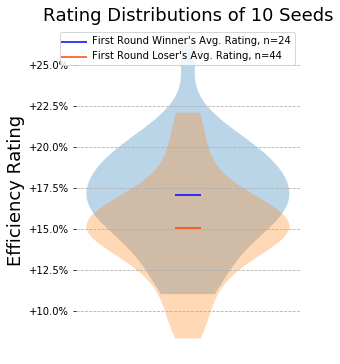

In [163]:
fig, ax = plt.subplots(1,1,figsize=(4,6))

ax.violinplot(wratings, showmeans=False, showextrema=False)
ax.violinplot(lratings, showmeans=False, showextrema=False)
ax.scatter([1], [np.mean(wratings)], color='blue', marker='_', s=700, label="First Round Winner's Avg. Rating, n={}".format(len(wratings)))
ax.scatter([1], [np.mean(lratings)], color='orangered', marker='_', s=700, label="First Round Loser's Avg. Rating, n={}".format(len(lratings)))

ax.set_title('Rating Distributions of 10 Seeds', fontsize=18)
ax.set_ylabel('Efficiency Rating', fontsize=18)
#ax.set_xlabel('Frequency', fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([])
ax.set_yticks(np.linspace(10,25,7))
ax.set_yticklabels(['+10.0%', '+12.5%', '+15.0%', '+17.5%', '+20.0%', '+22.5%', '+25.0%'])

#ax.set_xlim([0.7,1.3])

ax.yaxis.grid(linestyle='--')
ax.legend()

#plt.savefig('tenseed_violin.png')
plt.show()

In [383]:
# T-Test of Sample Means
stats.ttest_ind(wratings, lratings, equal_var=True)

Ttest_indResult(statistic=2.5334096198709575, pvalue=0.013679091105219445)

In [397]:
stats.t.interval(0.9, len(wratings), loc=np.mean(wratings), scale=stats.sem(wratings))

(15.91403385690999, 18.24147447642334)

In [396]:
stats.t.interval(0.9, len(lratings), loc=np.mean(lratings), scale=stats.sem(lratings))

(14.341702729606006, 15.838702270393991)

In [390]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(wratings), sms.DescrStatsW(lratings))
print(cm.tconfint_diff(usevar='pooled'))

(0.42117451778702764, 3.5539288155463127)


### Or Are the 7 seeds who lose just bad?

In [165]:
wratings7 = seven_over_ten['WRating']
lratings7 = ten_over_seven['LRating']

In [166]:
# T-Test of Sample Means
stats.ttest_ind(wratings7, lratings7, equal_var=True)

Ttest_indResult(statistic=2.7525275882895013, pvalue=0.007628978896525329)

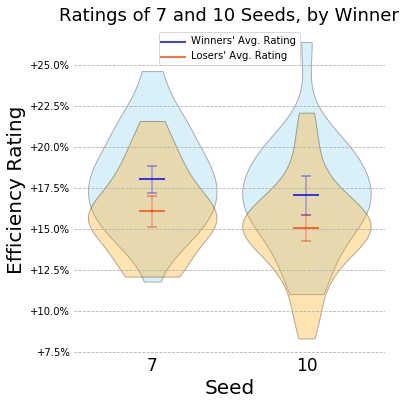

In [445]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

plt.gcf().subplots_adjust(left=0.18)

parts10w = ax.violinplot(wratings, positions=[1.6], showmeans=False, showextrema=False)
parts10l = ax.violinplot(lratings, positions=[1.6], showmeans=False, showextrema=False)
parts7w = ax.violinplot(wratings7, positions=[1], showmeans=False, showextrema=False)
parts7l = ax.violinplot(lratings7, positions=[1], showmeans=False, showextrema=False)

for pc in parts10w['bodies']:
    #pc.set_facecolor('#D43F3A')
    pc.set_facecolor('skyblue')
    pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
for pc in parts10l['bodies']:
    pc.set_facecolor('orange')
    pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
for pc in parts7w['bodies']:
    pc.set_facecolor('skyblue')
    pc.set_edgecolor('black')
    #pc.set_alpha(1)

for pc in parts7l['bodies']:
    pc.set_facecolor('orange')
    pc.set_edgecolor('black')
    #pc.set_alpha(1)


ax.scatter([1], [np.mean(wratings7)], color='blue', marker='_', s=700)#, label="First Round Winner's Avg. Rating, n={}".format(len(wratings)))
ax.scatter([1], [np.mean(lratings7)], color='orangered', marker='_', s=700)#, label="First Round Loser's Avg. Rating, n={}".format(len(lratings))) 
ax.scatter([1.6], [np.mean(wratings)], color='blue', marker='_', s=700, label="Winners' Avg. Rating")
ax.scatter([1.6], [np.mean(lratings)], color='orangered', marker='_', s=700, label="Losers' Avg. Rating")

ax.set_title('Ratings of 7 and 10 Seeds, by Winner', fontsize=18)
ax.set_ylabel('Efficiency Rating', fontsize=20)
ax.set_xlabel('Seed', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([1, 1.6])
ax.set_xticklabels([7, 10], fontsize=17)
#ax.set_yticks(np.linspace(10,25,7))
ax.set_yticklabels(['', '+7.5%', '+10.0%', '+12.5%', '+15.0%', '+17.5%', '+20.0%', '+22.5%', '+25.0%'])

ax.tick_params(axis=u'both', which=u'both',length=0)

errors = [np.std(wratings7)*1.88/np.sqrt(len(wratings7)), np.std(wratings)*1.79/np.sqrt(len(wratings))]
markers, caps, bars = ax.errorbar([1,1.6], [np.mean(wratings7), np.mean(wratings)], yerr=errors, fmt='o', ecolor='blue',capsize=5, capthick=2)

# loop through bars and caps and set the alpha value
markers.set_alpha(0)
[bar.set_alpha(.3) for bar in bars]
[cap.set_alpha(.3) for cap in caps]

errors = [np.std(lratings7)*1.88/np.sqrt(len(lratings7)), np.std(lratings)*1.79/np.sqrt(len(lratings))]
markers, caps, bars = ax.errorbar([1,1.6], [np.mean(lratings7), np.mean(lratings)], yerr=errors, fmt='o', ecolor='red',capsize=5, capthick=2)

# loop through bars and caps and set the alpha value
markers.set_alpha(0)
[bar.set_alpha(.3) for bar in bars]
[cap.set_alpha(.3) for cap in caps]

#ax.set_xlim([0.7,1.3])

ax.yaxis.grid(linestyle='--')
ax.legend(loc='upper center')

#plt.savefig('both_violin.png')
plt.show()

In [229]:
np.mean(wratings)- seed_avg_EM[7]

0.2133262254901993

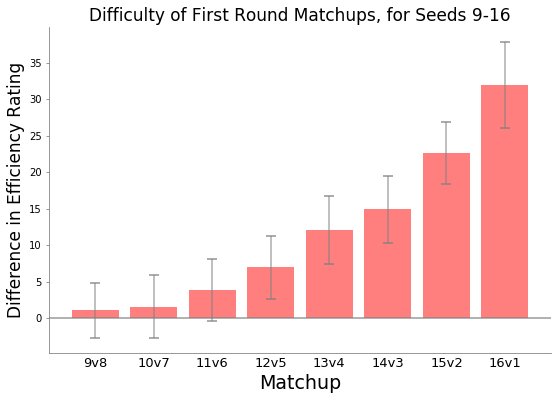

In [7]:
# Plot Difference in Average Efficiency For All First Round Games
difs = [seed_avg_EM[8-1]-seed_avg_EM[9-1],
        seed_avg_EM[7-1]-seed_avg_EM[10-1],
        seed_avg_EM[6-1]-seed_avg_EM[11-1],
        seed_avg_EM[5-1]-seed_avg_EM[12-1],
        seed_avg_EM[4-1]-seed_avg_EM[13-1],
        seed_avg_EM[3-1]-seed_avg_EM[14-1],
        seed_avg_EM[2-1]-seed_avg_EM[15-1],
        seed_avg_EM[1-1]-seed_avg_EM[16-1]]

errors = [np.sqrt(seed_sd_EM[8-1]**2 + seed_sd_EM[9-1]**2),
          np.sqrt(seed_sd_EM[7-1]**2 + seed_sd_EM[10-1]**2),
          np.sqrt(seed_sd_EM[6-1]**2 + seed_sd_EM[11-1]**2),
          np.sqrt(seed_sd_EM[5-1]**2 + seed_sd_EM[12-1]**2),
          np.sqrt(seed_sd_EM[4-1]**2 + seed_sd_EM[13-1]**2),
          np.sqrt(seed_sd_EM[3-1]**2 + seed_sd_EM[14-1]**2),
          np.sqrt(seed_sd_EM[2-1]**2 + seed_sd_EM[15-1]**2),
          np.sqrt(seed_sd_EM[1-1]**2 + seed_sd_EM[16-1]**2)]

fig, ax = plt.subplots(1,1,figsize=(9,6))

ax.bar(range(len(difs)), difs, color='red', alpha=.5)

ax.axhline(0, linestyle='-', color='grey', alpha=.8)

ax.set_title('Difficulty of First Round Matchups, for Seeds 9-16', fontsize=17)
ax.set_ylabel('Difference in Efficiency Rating', fontsize=17)
ax.set_xlabel('Matchup', fontsize=19)

ax.set_xticklabels(['', '9v8', '10v7', '11v6', '12v5', '13v4', '14v3', '15v2', '16v1'], fontsize=13)

ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

#ax.set_facecolor('whitesmoke')
#ax.yaxis.grid(color='white')

ax.tick_params(axis='x', which=u'both',length=0)
ax.tick_params(axis='y', which=u'both',color='grey')

markers, caps, bars = ax.errorbar(range(len(difs)), difs, yerr=errors, fmt='o', ecolor='grey',capsize=5, capthick=2)

# loop through bars and caps and set the alpha value
markers.set_alpha(0)
[bar.set_alpha(0.65) for bar in bars]
[cap.set_alpha(0.65) for cap in caps]

#plt.savefig('first_round_bars.png')
plt.show()

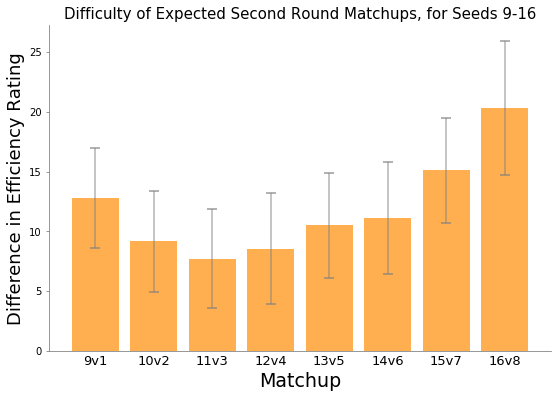

In [439]:
# Do Same for Second Round Games for All Seeds 8 - 16

difs = [seed_avg_EM[1-1]-seed_avg_EM[9-1],
        seed_avg_EM[2-1]-seed_avg_EM[10-1],
        seed_avg_EM[3-1]-seed_avg_EM[11-1],
        seed_avg_EM[4-1]-seed_avg_EM[12-1],
        seed_avg_EM[5-1]-seed_avg_EM[13-1],
        seed_avg_EM[6-1]-seed_avg_EM[14-1],
        seed_avg_EM[7-1]-seed_avg_EM[15-1],
        seed_avg_EM[8-1]-seed_avg_EM[16-1]]

errors = [np.sqrt(seed_sd_EM[1-1]**2 + seed_sd_EM[9-1]**2),
          np.sqrt(seed_sd_EM[2-1]**2 + seed_sd_EM[10-1]**2),
          np.sqrt(seed_sd_EM[3-1]**2 + seed_sd_EM[11-1]**2),
          np.sqrt(seed_sd_EM[4-1]**2 + seed_sd_EM[12-1]**2),
          np.sqrt(seed_sd_EM[5-1]**2 + seed_sd_EM[13-1]**2),
          np.sqrt(seed_sd_EM[6-1]**2 + seed_sd_EM[14-1]**2),
          np.sqrt(seed_sd_EM[7-1]**2 + seed_sd_EM[15-1]**2),
          np.sqrt(seed_sd_EM[8-1]**2 + seed_sd_EM[16-1]**2)]

fig, ax = plt.subplots(1,1,figsize=(9,6))

ax.bar(range(len(difs)), difs, color='darkorange', alpha=.69)

ax.set_title('Difficulty of Expected Second Round Matchups, for Seeds 9-16', fontsize=15)
ax.set_ylabel('Difference in Efficiency Rating', fontsize=18)
ax.set_xlabel('Matchup', fontsize=19)

ax.set_xticklabels(['', '9v1', '10v2', '11v3', '12v4', '13v5', '14v6', '15v7', '16v8'], fontsize=13)

ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

#ax.set_facecolor('whitesmoke')
#ax.yaxis.grid(color='white')

ax.tick_params(axis='x', which=u'both',length=0)
ax.tick_params(axis='y', which=u'both',color='grey')

markers, caps, bars = ax.errorbar(range(len(difs)), difs, yerr=errors, fmt='o', ecolor='grey',capsize=5, capthick=2)

# loop through bars and caps and set the alpha value
markers.set_alpha(0)
[bar.set_alpha(0.6) for bar in bars]
[cap.set_alpha(0.6) for cap in caps]

#plt.savefig('second_round_bars.png')
plt.show()

## Plot strength of 13-16 seeds over time

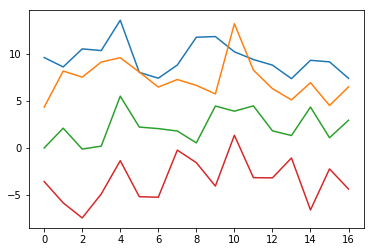

In [362]:
ratings13 = []
ratings14 = []
ratings15 = []
ratings16 = []

for year in range(2002, 2019):
    ratings13.append(np.mean(data[np.logical_and(data['Season']==year, data['seed']==13)]['AdjEM']))
    ratings14.append(np.mean(data[np.logical_and(data['Season']==year, data['seed']==14)]['AdjEM']))
    ratings15.append(np.mean(data[np.logical_and(data['Season']==year, data['seed']==15)]['AdjEM']))
    ratings16.append(np.mean(data[np.logical_and(data['Season']==year, data['seed']==16)]['AdjEM']))
    
plt.plot(ratings13)
plt.plot(ratings14)
plt.plot(ratings15)
plt.plot(ratings16)

plt.show()

## Seeding for Auto Bids vs. At-Large Bids

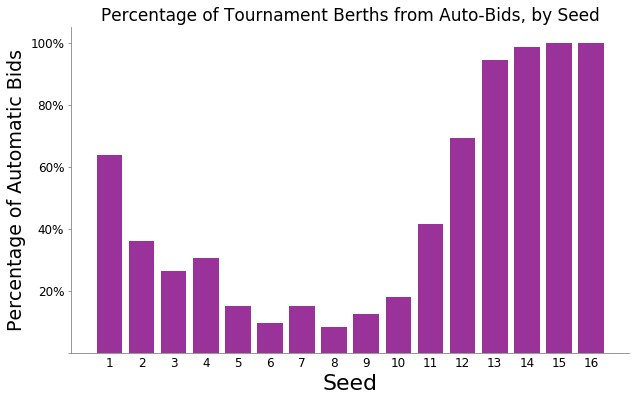

In [450]:
auto_count = {'1': 3+2+3+3+3+3+1+3+1+4+4+2+3+2+2+2+2+3,      # Leaving out 2010 - not on wikipedia
              '2': 1+3+1+2+0+2+1+1+2+0+2+1+1+3+1+1+1+3,
              '3': 1+0+0+2+1+1+1+1+1+1+1+3+1+0+1+3+1+0,
              '4': 2+0+1+0+3+1+1+1+1+2+0+1+3+2+2+1+1+0,
              '5': 1+1+0+1+0+0+2+0+2+1+0+2+0+0+0+1+0+0,
              '6': 0+1+1+0+0+1+1+0+1+0+0+0+0+1+1+0+0+0,
              '7': 0+1+0+1+1+1+1+1+0+1+1+0+0+1+0+1+1+0,
              '8': 0+0+1+0+0+0+2+1+0+1+0+0+0+0+1+0+0+0,
              '9': 0+0+1+0+0+0+0+1+1+1+0+2+0+0+0+1+1+1,
              '10': 0+1+0+0+1+0+0+0+1+1+2+0+1+1+0+2+1+2,
              '11': 2+1+2+0+1+2+1+1+3+0+3+3+1+2+3+1+2+2,
              '12': 4+4+4+4+3+3+3+3+2+3+1+2+2+3+2+1+4+2,
              '13': 4+4+4+4+4+3+4+4+4+4+4+2+4+3+4+4+4+4,
              '14': 4+4+4+4+4+4+3+4+4+4+4+4+4+4+4+4+4+4,
              '15': 4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4,
              '16': 4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4}

auto_list = np.divide(np.array(list(auto_count.values())), 18*4)

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.bar(range(len(auto_count.keys())), auto_list, color='purple', alpha=.8)

ax.set_title('Percentage of Tournament Berths from Auto-Bids, by Seed', fontsize=17)
ax.set_ylabel('Percentage of Automatic Bids', fontsize=19)
ax.set_xlabel('Seed', fontsize=22)

ax.set_xticks(range(16))
ax.set_xticklabels(range(1,17), fontsize=12)
ax.set_yticklabels(['', '20%', '40%', '60%', '80%', '100%'], fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

#ax.set_facecolor('whitesmoke')
#ax.yaxis.grid(color='white')

ax.tick_params(axis='x', which=u'both',length=0)
ax.tick_params(axis='y', which=u'both',color='grey')

#plt.savefig('auto_bids.pdf')
plt.show()

In [454]:
total_berths = 72*4
auto_berths = auto_count['13']+auto_count['14']+auto_count['15']+auto_count['16']
print('Percentage of Berths from Automatic Bids: ', auto_berths/total_berths)

Percentage of Berths from Automatic Bids:  0.9826388888888888
